# Installing all packages and importing files

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [43]:
gen_1=pd.read_csv('./Plant_2_Generation_Data.csv')
gen_1.drop('PLANT_ID',1,inplace=True)

gen_2=pd.read_csv('./Plant_1_Generation_Data.csv')
gen_2.drop('PLANT_ID',1,inplace=True)

sens_1= pd.read_csv('./Plant_2_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',1,inplace=True)
#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%Y-%m-%d %H:%M') #named plant 2 data as gen_1
gen_2['DATE_TIME']= pd.to_datetime(gen_2['DATE_TIME'],format='%d-%m-%Y %H:%M') #named plant 1 data as gen_2
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

# Daily Yield & AC-DC power
This plot shows that plant 1 is only outputting barely 10% of expected inverted output. Massive human error involved. Data cannot be used.

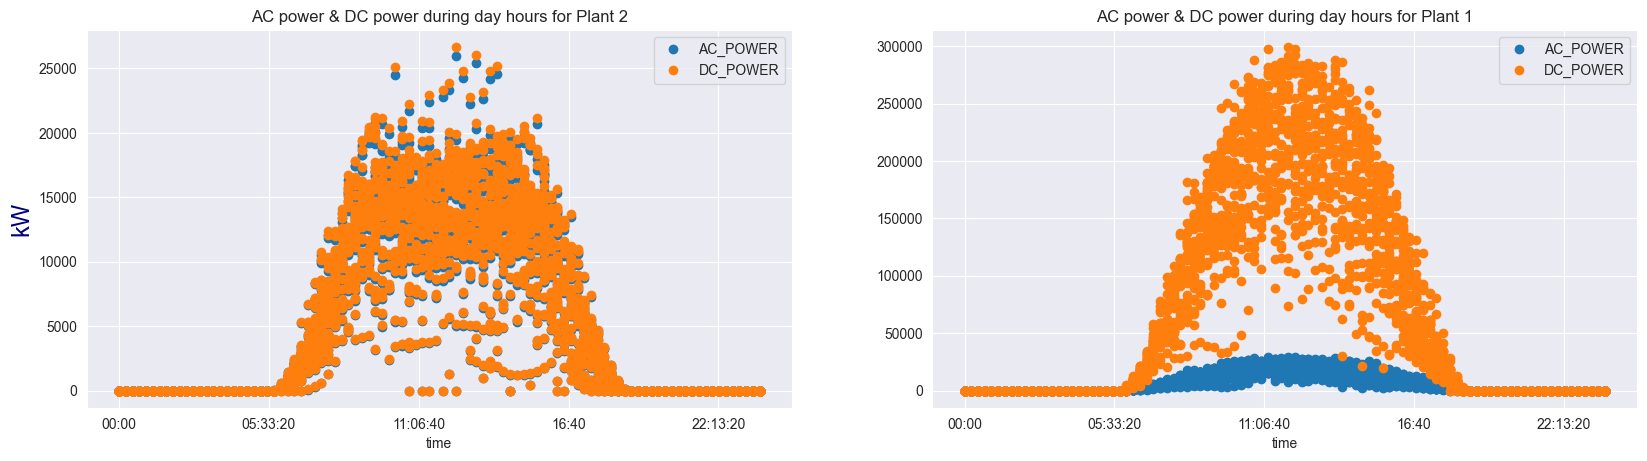

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
3100,2020-05-16 11:15:00,xMbIugepa2P7lBB,1231.357143,1200.571429,3447.428571,1.066695e+08
3101,2020-05-16 11:15:00,xoJJ8DcxJEcupym,0.000000,0.000000,1792.000000,2.091485e+08
3102,2020-05-16 11:30:00,4UPUqMRk7TRMgml,0.000000,0.000000,2525.000000,2.435737e+06
3103,2020-05-16 11:30:00,81aHJ1q11NBPMrL,928.700000,905.486667,3782.666667,1.215286e+09
3104,2020-05-16 11:30:00,9kRcWv60rDACzjR,1261.440000,1229.893333,3735.133333,2.247733e+09
3105,2020-05-16 11:30:00,Et9kgGMDl729KT4,1158.866667,1130.920000,2685.133333,1.711089e+06
3106,2020-05-16 11:30:00,IQ2d7wF4YD8zU1Q,1287.466667,1255.280000,3843.000000,1.995503e+07
3107,2020-05-16 11:30:00,LYwnQax7tkwH5Cb,0.000000,0.000000,1828.000000,1.794969e+09
3108,2020-05-16 11:30:00,LlT2YUhhzqhg5Sw,1265.833333,1234.193333,3697.666667,2.826057e+08
3109,2020-05-16 11:30:00,Mx2yZCDsyf6DPfv,0.000000,0.000000,2582.000000,2.464028e+06


In [44]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index() #group all items by the increments, which has several inverters. SUm all the inverter values into one. SO you get one value per time step for each collumn
df_gen['time']=df_gen['DATE_TIME'].dt.time #taking the time component from datetime and making a collumn

#Setting up plant 2 dataframe
df_gen2=gen_2.groupby('DATE_TIME').sum().reset_index()
df_gen2['time']=df_gen2['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

# daily yield plot
#df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])


# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[0]) #plant 2 plot
df_gen2.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1]) #plant 1 plot


#ax[0].set_title('Daily yield',)


ax[0].set_title('AC power & DC power during day hours for Plant 2')
ax[1].set_title('AC power & DC power during day hours for Plant 1')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

pd.options.display.max_rows = 4000 #output text size
gen_1[3100:3120] #snapshot of plant 1 to illustrate this dataframe carries several inverters for each time step


# Illustrate that all inverter values have been added to total across each step 
In the above table each inverter is listed individually, on the below table they have all had their values combined for a single output per date-time unit.

In [45]:
df_gen[115:135] 

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time
115,2020-05-16 05:00:00,0.000000,0.000000,18561.000000,1.418976e+10,05:00:00
116,2020-05-16 05:15:00,0.000000,0.000000,18561.000000,1.418976e+10,05:15:00
117,2020-05-16 05:30:00,0.000000,0.000000,631.000000,1.407909e+10,05:30:00
118,2020-05-16 05:45:00,0.000000,0.000000,0.000000,1.418960e+10,05:45:00
119,2020-05-16 06:00:00,313.557619,302.671905,22.295238,1.418976e+10,06:00:00
120,2020-05-16 06:15:00,1032.840000,998.906667,179.800000,1.409562e+10,06:15:00
121,2020-05-16 06:30:00,1892.047619,1836.448571,533.347619,1.418976e+10,06:30:00
122,2020-05-16 06:45:00,2790.566667,2715.686667,1101.066667,1.418976e+10,06:45:00
123,2020-05-16 07:00:00,3700.975238,3625.843810,1899.504762,1.418976e+10,07:00:00
124,2020-05-16 07:15:00,5537.123333,5433.604762,2946.466667,1.418976e+10,07:15:00


# Why original DAILY_YIELD and TOTAL_YIELD is wrong

Source Data mentions that DAILY_YIELD is a cumulative sum of power generated on that day, till that point in time. Power is a running rate, it cannot be Cumulative. Therefore we assume that DAILY_YIELD is in KWh (energy). Source Data also mentions TOTAL_YIELD is the total yield for the inverter till that point in time. However, cumulative calculations are not consistent and therefore unusable. 

A snapshot of 3 days will be shown for both. DAILY_YIELD frequenlty dips, even though it has the correct general shape. This cannot be as it is reasonably a calculated value and is CUMULATIVE. The flat lines of TOTAL_YIELD also indicates to clue that it is not a proper cumulative, especially since DAILY_YIELD is regularly producing output. There is also dips here, which are not possible.



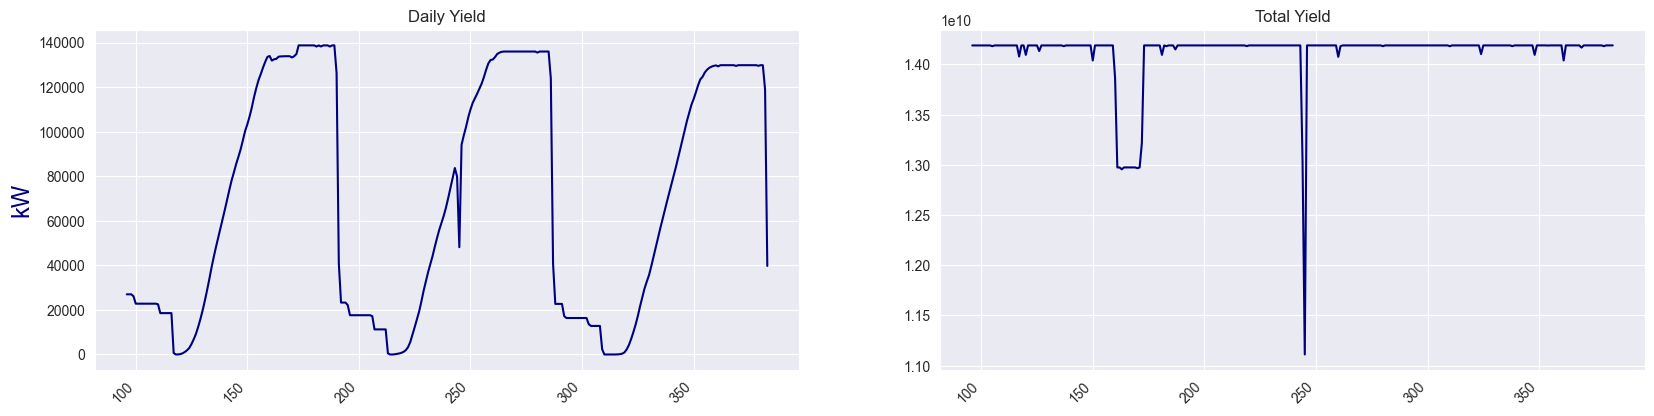

In [46]:
testDays = df_gen.loc[(df_gen['DATE_TIME'] > '2020-05-16') & (df_gen['DATE_TIME'] <= "2020-05-19")]


fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
testDays['DAILY_YIELD'].plot(ax=ax[0],color='navy') # DAILY_YIELD graph
testDays['TOTAL_YIELD'].plot(ax=ax[1],color='navy') #TOTAL_YIELD graph
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

#testDays

# Creating new and correct DAILY_YIELD and TOTAL_YIELD

In [47]:
new_df=df_gen.copy()
new_df = new_df.drop(['DAILY_YIELD','TOTAL_YIELD'], 1) #Dropping DAILY_YIELD & TOTAL_YIELD. UNUSABLE

#Converting AC power to KWh entails dividing by 4 since there are 4*15 min in an hour.
new_df["NEW_YIELD"] = (new_df['AC_POWER'] * 0.25) #Energy generation during this step

new_df['date']=new_df['DATE_TIME'].dt.date #taking date component of datetime into a new collumn


new_df["DAILY_YIELD"] = new_df.groupby('date').NEW_YIELD.cumsum() 
new_df["TOTAL_YIELD"] = new_df.NEW_YIELD.cumsum() 

new_df[110:130] #snapshot of new dataframe (single step)



,DATE_TIME,DC_POWER,AC_POWER,time,NEW_YIELD,date,DAILY_YIELD,TOTAL_YIELD
110,2020-05-16 03:45:00,0.000000,0.000000,03:45:00,0.000000,2020-05-16,0.000000,162859.434167
111,2020-05-16 04:00:00,0.000000,0.000000,04:00:00,0.000000,2020-05-16,0.000000,162859.434167
112,2020-05-16 04:15:00,0.000000,0.000000,04:15:00,0.000000,2020-05-16,0.000000,162859.434167
113,2020-05-16 04:30:00,0.000000,0.000000,04:30:00,0.000000,2020-05-16,0.000000,162859.434167
114,2020-05-16 04:45:00,0.000000,0.000000,04:45:00,0.000000,2020-05-16,0.000000,162859.434167
115,2020-05-16 05:00:00,0.000000,0.000000,05:00:00,0.000000,2020-05-16,0.000000,162859.434167
116,2020-05-16 05:15:00,0.000000,0.000000,05:15:00,0.000000,2020-05-16,0.000000,162859.434167
117,2020-05-16 05:30:00,0.000000,0.000000,05:30:00,0.000000,2020-05-16,0.000000,162859.434167
118,2020-05-16 05:45:00,0.000000,0.000000,05:45:00,0.000000,2020-05-16,0.000000,162859.434167
119,2020-05-16 06:00:00,313.557619,302.671905,06:00:00,75.667976,2020-05-16,75.667976,162935.102143


Display New Data Pattern from May 15 to May 19

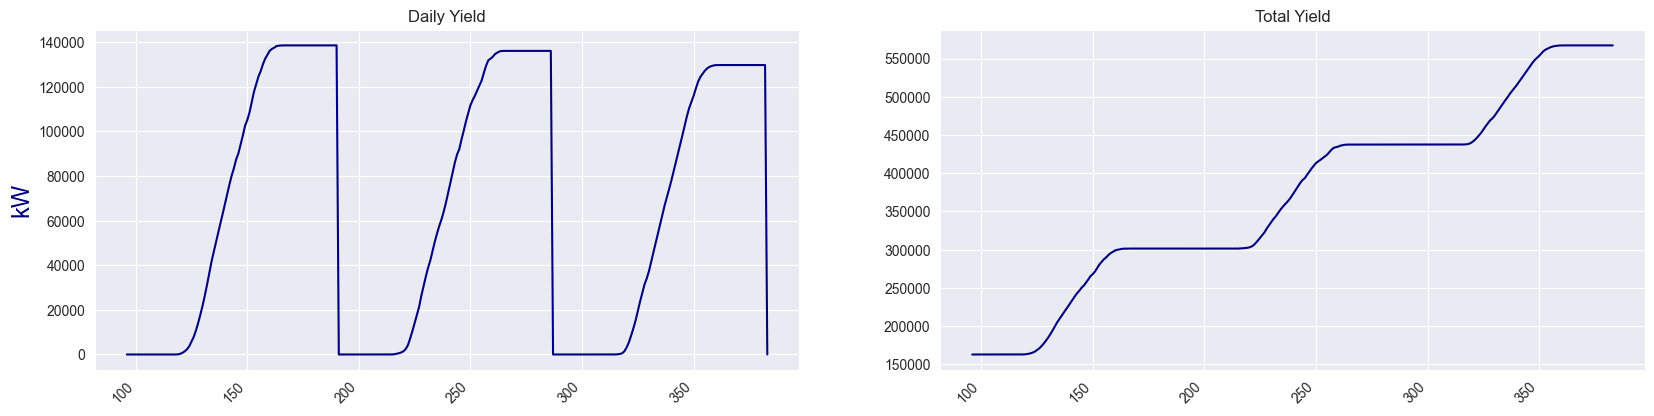

In [48]:
testDays2 = new_df.loc[(df_gen['DATE_TIME'] > '2020-05-16') & (df_gen['DATE_TIME'] <= "2020-05-19")]


fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
testDays2['DAILY_YIELD'].plot(ax=ax[0],color='navy') # DAILY_YIELD graph
testDays2['TOTAL_YIELD'].plot(ax=ax[1],color='navy') #TOTAL_YIELD graph
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

#new_df.head

# Compare to Plant 1 YIELD datas
Over the same period

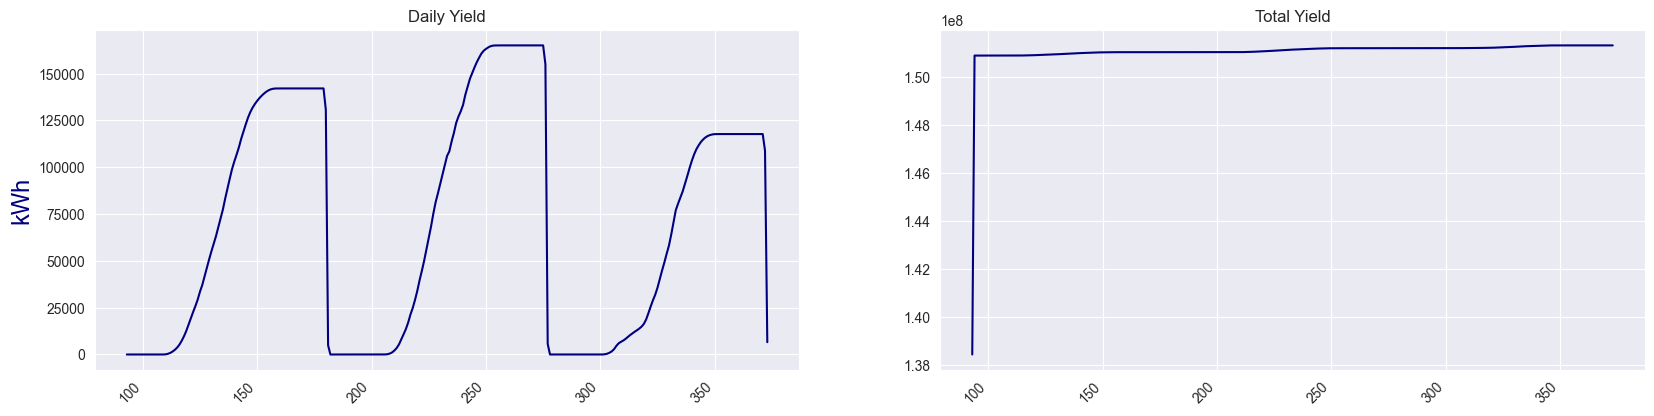

In [49]:
testDays3 = df_gen2.loc[(df_gen2['DATE_TIME'] > '2020-05-16') & (df_gen2['DATE_TIME'] <= "2020-05-19")]


fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
testDays3['DAILY_YIELD'].plot(ax=ax[0],color='navy') # DAILY_YIELD graph
testDays3['TOTAL_YIELD'].plot(ax=ax[1],color='navy') #TOTAL_YIELD graph
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kWh',color='navy',fontsize=17)
plt.show()


# Daily and Total Yield Plots
Replacing df_gen for easier carrydown

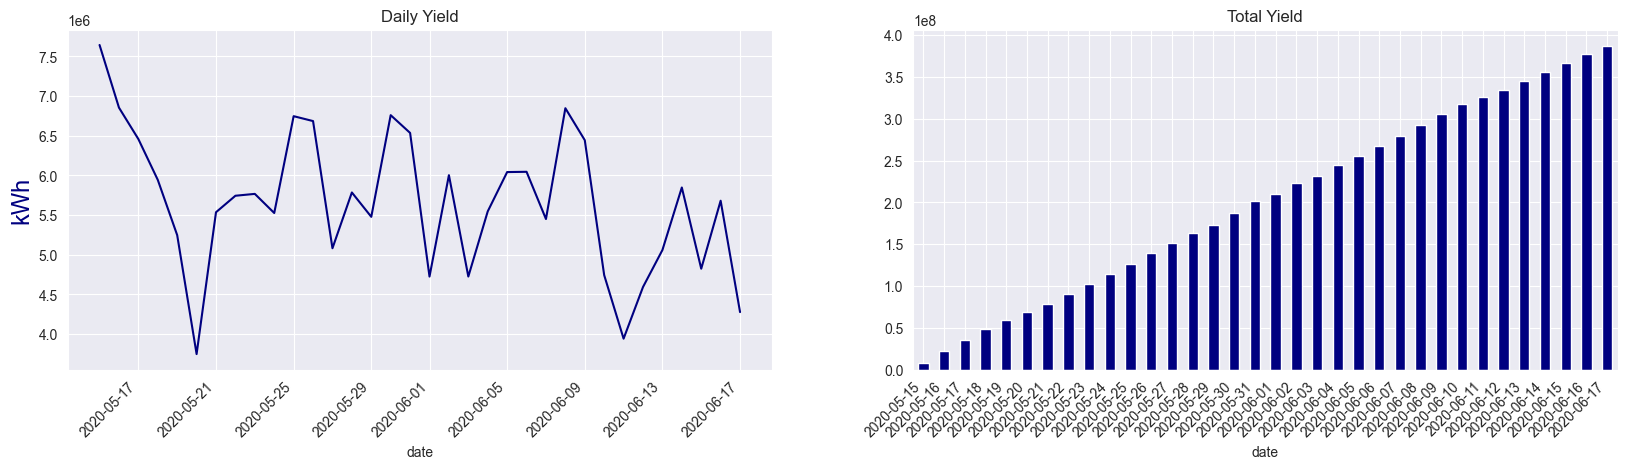

,DC_POWER,AC_POWER,NEW_YIELD,DAILY_YIELD,TOTAL_YIELD
date,,,,,
2020-05-15,666607.630952,651437.736667,162859.434167,7.645248e+06,7.645248e+06
2020-05-16,566839.840000,554253.460476,138563.365119,6.854685e+06,2.248919e+07
2020-05-17,556236.918205,544393.020916,136098.255229,6.457714e+06,3.539430e+07
2020-05-18,530773.677143,519012.565238,129753.141310,5.942708e+06,4.794473e+07
2020-05-19,443495.847015,433554.722647,108388.680662,5.245356e+06,5.913640e+07
2020-05-20,352374.378810,344661.406190,86165.351548,3.744291e+06,6.860793e+07
2020-05-21,494112.260000,483021.364286,120755.341071,5.534586e+06,7.867010e+07
2020-05-22,498711.327619,487411.941136,121852.985284,5.742565e+06,9.047059e+07
2020-05-23,501823.294762,490450.510476,122612.627619,5.766006e+06,1.021919e+08


In [50]:
df_gen = new_df #replacing df_gen for easier carrydown
daily_gen=df_gen.copy()
daily_gen['date']=daily_gen['DATE_TIME'].dt.date #taking date component of datetime into a new collumn

daily_gen=daily_gen.groupby('date').sum() #summing all the steps in a date so u get one value per date

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
daily_gen['DAILY_YIELD'].plot(ax=ax[0],color='navy')
daily_gen['TOTAL_YIELD'].plot(kind='bar',ax=ax[1],color='navy')
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kWh',color='navy',fontsize=17)
plt.show()

daily_gen

# Forecast to predict the power generation for next couple of days

We're going to predict exactly the next two days of yield generated by plant_1 raw data, plant_2 corrected data, as well as dc output for both plants.

We will tune, with auto_arima function, a SEASONAL ARIMA(p,d,q) + (P,D,Q,m) model,on the last 4 days(384 observations) to see if our model can capture the last generation trend. 

In [51]:
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


zsh:1: command not found: pip


New fixed genarator 2 Data. Here we are summing on DATE-TIME for each Source key instead of just DATE-TIME.

In [52]:
new_gen1=gen_1.copy()
new_gen1 = new_gen1.drop(['DAILY_YIELD','TOTAL_YIELD'], 1) #Dropping DAILY_YIELD & TOTAL_YIELD. UNUSABLE

new_gen1["NEW_YIELD"] = (new_gen1['AC_POWER'] * 0.25) #Energy generation during this step

new_gen1['date']=new_gen1['DATE_TIME'].dt.date #taking date component of datetime into a new collumn


new_gen1["DAILY_YIELD"] = new_gen1.groupby(['date', 'SOURCE_KEY']).NEW_YIELD.cumsum() 
new_gen1["TOTAL_YIELD"] = new_gen1.NEW_YIELD.cumsum() 

#new_gen1[500:600] 

# Our DATAFRAMES:
#### Generator 1 DAILY_YIELD raw values

Each day has 96 steps (24 hours divided by 15 min). So 288 means 3*96 for a total of 3 days.

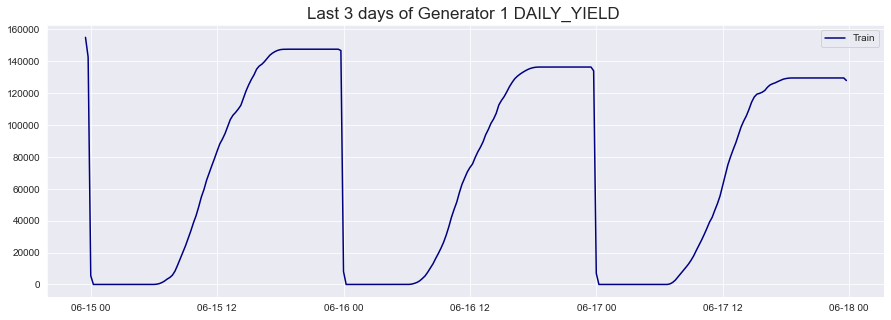

In [53]:
#pred_gen=gen_2.copy()
pred_gen1_DY=gen_2.copy()

pred_gen1_DY=pred_gen1_DY.groupby('DATE_TIME').sum()
pred_gen1_DY=pred_gen1_DY['DAILY_YIELD'][-288:].reset_index()
pred_gen1_DY.set_index('DATE_TIME',inplace=True)
pd.options.display.max_rows = 4000


plt.figure(figsize=(15,5))
plt.plot(pred_gen1_DY,label='Train',color='navy')
plt.title('Last 3 days of Generator 1 DAILY_YIELD ',fontsize=17)
plt.legend()
plt.show()

#### Generator 2 DAILY_YIELD fixed (calculated from AC power) values:

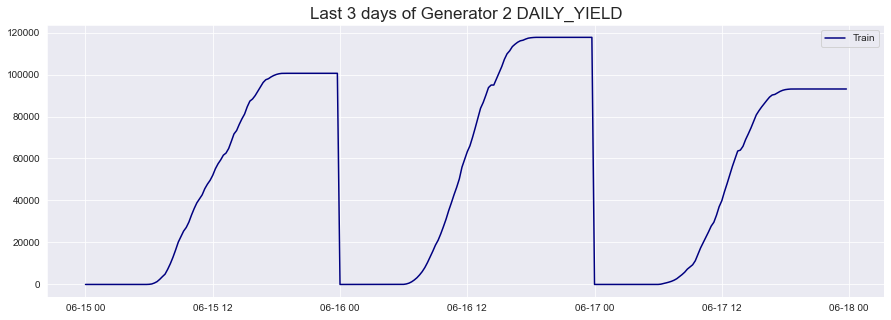

In [55]:
pred_gen2_DY=new_gen1.copy()
pred_gen2_DY=pred_gen2_DY.groupby('DATE_TIME').sum()
pred_gen2_DY=pred_gen2_DY['DAILY_YIELD'][-288:].reset_index()
pred_gen2_DY.set_index('DATE_TIME',inplace=True)
pd.options.display.max_rows = 4000


plt.figure(figsize=(15,5))
plt.plot(pred_gen2_DY,label='Train',color='navy')
plt.title('Last 3 days of Generator 2 DAILY_YIELD',fontsize=17)
plt.legend()
plt.show()

#### Generator 1 DC_OUTPUT values:

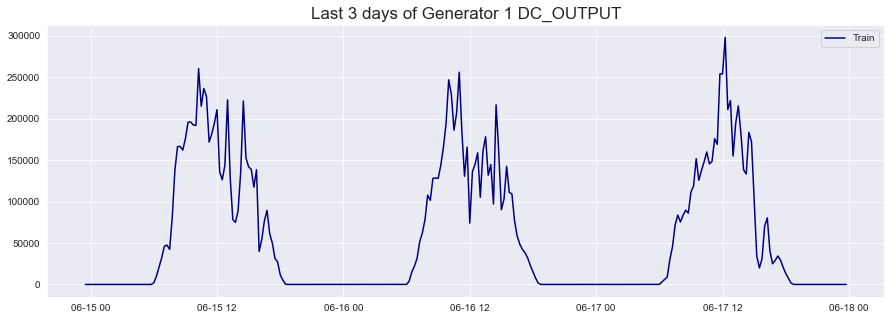

In [56]:
pred_gen1_DC=gen_2.copy()
pred_gen1_DC=pred_gen1_DC.groupby('DATE_TIME').sum()
pred_gen1_DC=pred_gen1_DC['DC_POWER'][-288:].reset_index()
pred_gen1_DC.set_index('DATE_TIME',inplace=True)
pd.options.display.max_rows = 4000


plt.figure(figsize=(15,5))
plt.plot(pred_gen1_DC,label='Train',color='navy')
plt.title('Last 3 days of Generator 1 DC_OUTPUT',fontsize=17)
plt.legend()
plt.show()

#### Generator 2 DC_OUTPUT values:

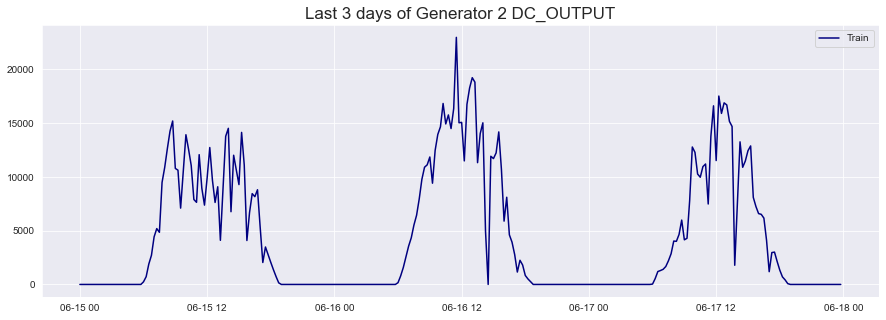

In [57]:
pred_gen2_DC=gen_1.copy()
pred_gen2_DC=pred_gen2_DC.groupby('DATE_TIME').sum()
pred_gen2_DC=pred_gen2_DC['DC_POWER'][-288:].reset_index()
pred_gen2_DC.set_index('DATE_TIME',inplace=True)
pd.options.display.max_rows = 4000


plt.figure(figsize=(15,5))
plt.plot(pred_gen2_DC,label='Train',color='navy')
plt.title('Last 3 days of Generator 2 DC_OUTPUT',fontsize=17)
plt.legend()
plt.show()

taken from <https://www.kaggle.com/virosky/how-to-manage-a-solar-power-plant#Task-1:-Can-we-identify-faulty-or-suboptimally-performing-equipment?>


## Testing for Stationarity

We can use the Augmented Dickey-Fuller unit root test.

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying whether to accept the Null Hypothesis H0 (that the time series has a unit root, indicating it is non-stationary) or reject H0 and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

We will do this for all 4 of our dataframes. This will affect the 'd' value when we train the model.

In [151]:
dataframes = [pred_gen1_DY['DAILY_YIELD'], pred_gen2_DY['DAILY_YIELD'], pred_gen1_DC['DC_POWER'], pred_gen2_DC['DC_POWER']]
dataframe_labels = ['pred_gen1_DY', 'pred_gen2_DY', 'pred_gen1_DC', 'pred_gen2_DC']

for value1, dataframe_labels in zip(dataframes, dataframe_labels):

    result = adfuller(value1)
    print('Augmented Dickey-Fuller Test for ', dataframe_labels)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    if result[1] <= 0.05:
        print("Set d to 0.")
    else:
        print("Set d to 1.")
        
    print('\r\r\r\n')





Augmented Dickey-Fuller Test for  pred_gen1_DY
ADF Test Statistic : -2.2899376474793596
p-value : 0.175233820749297
#Lags Used : 1
Number of Observations Used : 286
Set d to 1.


Augmented Dickey-Fuller Test for  pred_gen2_DY
ADF Test Statistic : -1.8020534656955074
p-value : 0.3794426825301318
#Lags Used : 0
Number of Observations Used : 287
Set d to 1.


Augmented Dickey-Fuller Test for  pred_gen1_DC
ADF Test Statistic : -4.022039226539307
p-value : 0.0012994039464853018
#Lags Used : 11
Number of Observations Used : 276
Set d to 0.


Augmented Dickey-Fuller Test for  pred_gen2_DC
ADF Test Statistic : -3.3826019749519554
p-value : 0.011566462054167788
#Lags Used : 11
Number of Observations Used : 276
Set d to 0.




## Step 2: Split into train and test datasets to build the model on the training dataset and forecast using the test dataset.

Reference from the documentation of ARIMAX:

The auto_arima function fits the best ARIMA model to an univariate time series according to a provided information criterion (either AIC, AICc, BIC or HQIC). The function performs a search (either stepwise or parallelized) over possible model & seasonal orders within the constraints provided, and selects the parameters that minimize the given metric.

ARIMA models are made up of three different terms:

p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
d: The degree of differencing.
q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

Seasonal ARIMA models have three parameters that heavily resemble our p, d and q parameters:

`P` is  The order of the seasonal component for the auto-regressive (AR) model.

`D` is The integration order of the seasonal process.

`Q` is The order of the seasonal component of the moving average (MA) model.
P and Q and be estimated similarly to p and q via auto_arima, and D can be estimated via a Canova-Hansen test, however m generally requires subject matter knowledge of the data.

Each day we hhas 96 observations at 15 min intervals so `m` = 96 to capture daily trend.
P,D,Q paramaters in the seasonal component set to default 1 for speed and simplicity. 

# pred_gen1_DY Forecasts
Setting up dataframe

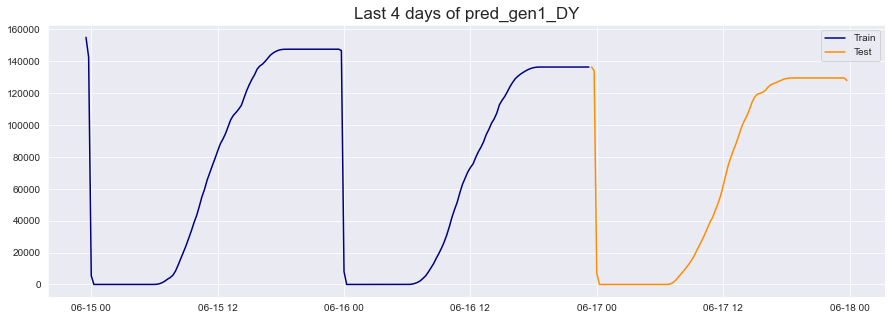

In [197]:
#train=pred_gen[:192]
#test=pred_gen[-98:]
#dataframes = [pred_gen1_DY, pred_gen2_DY, pred_gen1_DC, pred_gen2_DC]
#dataframe_labels = ['pred_gen1_DY', 'pred_gen2_DY', 'pred_gen1_DC', 'pred_gen2_DC']
#trainingData = []
#testData = []

#for dataframe, dataframe_labels in zip(dataframes, dataframe_labels):

dataframe = pred_gen1_DY
dataframe_labels = "pred_gen1_DY"


train = dataframe[:192]
test = dataframe[-96:]


plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of ' + dataframe_labels,fontsize=17)
plt.legend()
plt.show()

#train


Training and Forecasting

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1645.555, Time=1.17 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=1539.889, Time=25.45 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=1541.502, Time=36.80 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1539.528, Time=4.90 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=1539.889, Time=25.25 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=50.83 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=1538.237, Time=6.32 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=1539.552, Time=41.74 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=1539.555, Time=36.99 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=inf, Time=57.07 sec
 ARIMA(3,1,0)(0,1,0)[96]             : AIC=1530.967, Time=7.24 sec
 ARIMA(3,1,0)(1,1,0)[96]             : AIC=1528.008, Time=43.20 sec
 ARIMA(3,1,0)(1,1,1)[96]             : AIC=inf, Time=80.66 sec
 ARIMA(3,1,0)(0,1,1)[96]             : AIC=1527.753, Time=49.72 sec
 ARIMA(4,1,0)(0,1,1)[96]

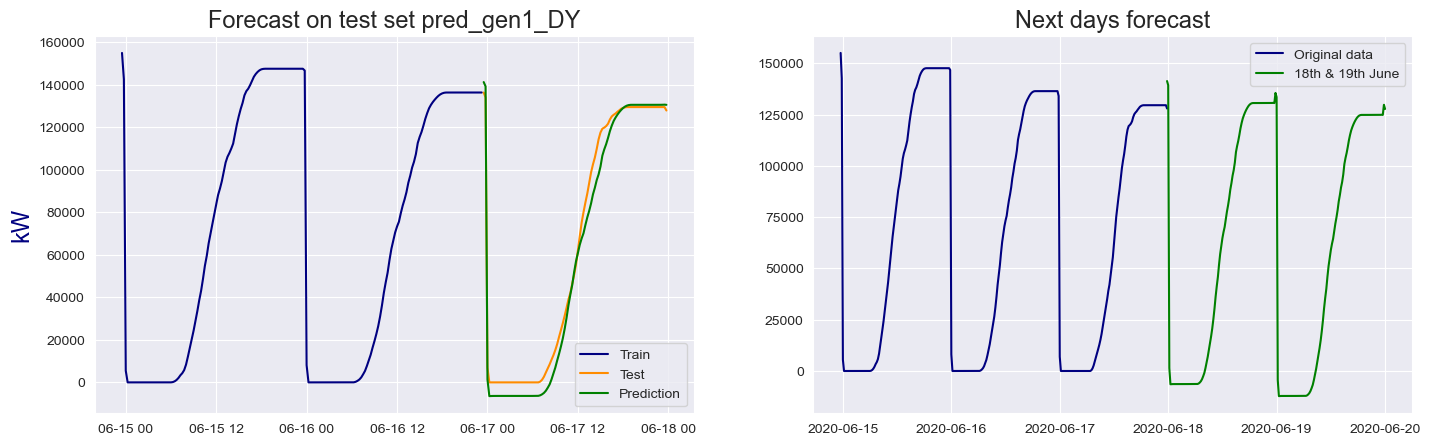

---------------
---------------
Baseline R2 Score: 0.887194
SARIMAX R2 Score: 0.986854
---------------
SARIMAX MAE Score: 5473.729123
Baseline MAE Score: 7648.030225
---------------
SARIMAX RMSE Score: 6801.701192
Baseline RMSE Score: 20079.759103


In [198]:
#for data1, data2, labels in zip(trainingData, testData, dataframe_labels):
#Didn't use loops because it caused issues with labels when attempted.

arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=12,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set ' + dataframe_labels,size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)



f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(dataframe,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()
print('-'*15)

arima_model.summary()



## Baseline vs Prediction metrics pred_gen1_DY

### Baseline
Setting up common-sense baseline for DAILY_YIELD

In [ ]:
baseline = dataframe.groupby([pd.to_datetime(dataframe.index.hour), pd.to_datetime(dataframe.index.minute)])["DAILY_YIELD"].mean()
baseline_df = pd.DataFrame(baseline)
baseline_df.plot()


In [ ]:
print('Baseline R2 Score: %f' % (r2_score(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'])))
print('SARIMAX R2 Score: %f' % (r2_score(prediction['predicted_yield'],test['DAILY_YIELD'])))
print('-'*15)
print('SARIMAX MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test['DAILY_YIELD'])))
print('Baseline MAE Score: %f' % (mean_absolute_error(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'])))
print('-'*15)
print('SARIMAX RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test['DAILY_YIELD'],squared=False)))
print('Baseline RMSE Score: %f' % (mean_squared_error(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'],squared=False)))

# pred_gen2_DY Forecasts
Setting up dataframe

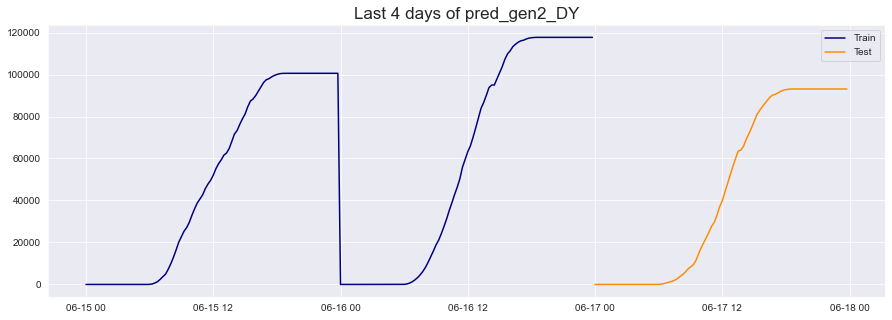

In [199]:

dataframe = pred_gen2_DY
dataframe_labels = "pred_gen2_DY"


train=dataframe[:192]
test=dataframe[-96:]

#trainingData.append(train)
#testData.append(test)

plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of ' + dataframe_labels,fontsize=17)
plt.legend()
plt.show()




Training and Forecasting

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1564.460, Time=1.14 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=inf, Time=12.38 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=1563.286, Time=14.29 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=1565.605, Time=4.15 sec
 ARIMA(0,1,1)(1,1,1)[96]             : AIC=1565.299, Time=14.09 sec
 ARIMA(0,1,1)(1,1,0)[96]             : AIC=1563.305, Time=13.12 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=1562.137, Time=6.92 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=1564.122, Time=14.21 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=1562.071, Time=14.01 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=1568.909, Time=34.13 sec
 ARIMA(0,1,0)(1,1,0)[96] intercept   : AIC=1563.417, Time=20.21 sec

Best model:  ARIMA(0,1,0)(1,1,0)[96]          
Total fit time: 148.675 seconds


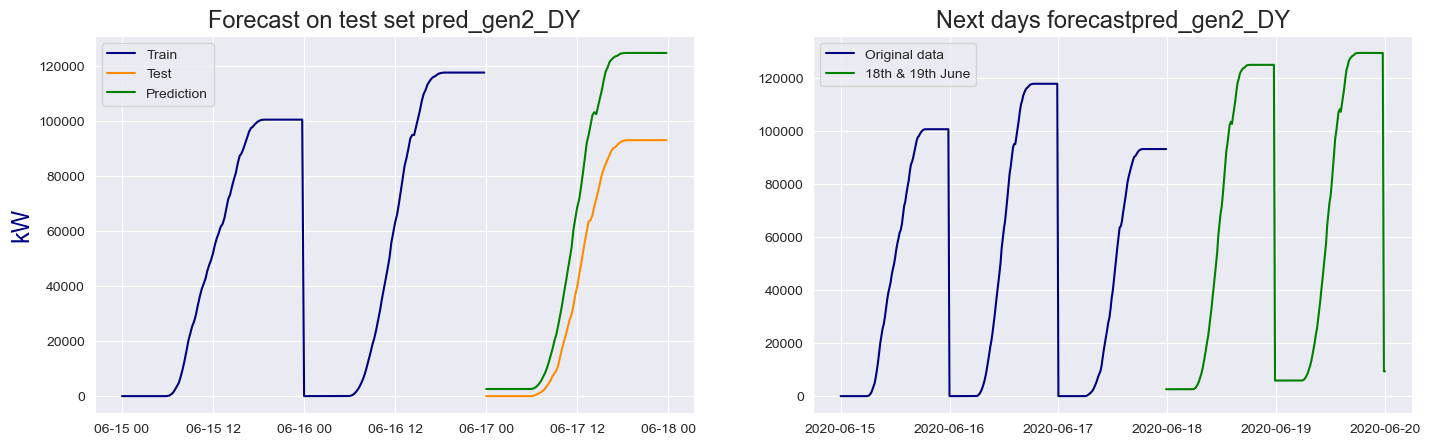

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 96)   Log Likelihood                -779.036
Date:                            Sun, 28 Nov 2021   AIC                           1562.071
Time:                                    20:18:52   BIC                           1567.179
Sample:                                         0   HQIC                          1564.135
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96       0.2652      0.091      2.924      0.003       0.087       0.443
sigma2      7.454e+05   6.79e+04     10.983      0.000    6.12e+05    8.78e+05
===================================================================================
Ljung-Box (L1) (Q):                  29.74   Jarque-Bera (JB):               111.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                             0.89
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:
arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=12,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set ' + dataframe_labels,size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(dataframe,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast' + dataframe_labels,size=17)
plt.show()


arima_model.summary()


## Baseline vs Prediction metrics pred_gen2_DY

### Baseline
Setting up common-sense baseline for DAILY_YIELD

<AxesSubplot:xlabel='DATE_TIME,DATE_TIME'>

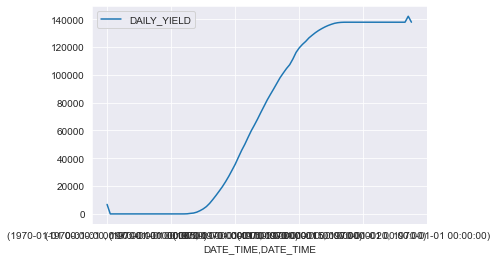

In [ ]:
baseline = dataframe.groupby([pd.to_datetime(dataframe.index.hour), pd.to_datetime(dataframe.index.minute)])["DAILY_YIELD"].mean()
baseline_df = pd.DataFrame(baseline)
baseline_df.plot()


In [201]:
print('Baseline R2 Score: %f' % (r2_score(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'])))
print('SARIMAX R2 Score: %f' % (r2_score(prediction['predicted_yield'],test['DAILY_YIELD'])))
print('-'*15)
print('SARIMAX MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test['DAILY_YIELD'])))
print('Baseline MAE Score: %f' % (mean_absolute_error(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'])))
print('-'*15)
print('SARIMAX RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test['DAILY_YIELD'],squared=False)))
print('Baseline RMSE Score: %f' % (mean_squared_error(baseline_df['DAILY_YIELD'], test['DAILY_YIELD'],squared=False)))

Baseline R2 Score: 0.729421
SARIMAX R2 Score: 0.803302
---------------
SARIMAX MAE Score: 19599.331946
Baseline MAE Score: 24256.644947
---------------
SARIMAX RMSE Score: 23710.231808
Baseline RMSE Score: 31098.518404


# pred_gen1_DC Forecasts
Setting up dataframe

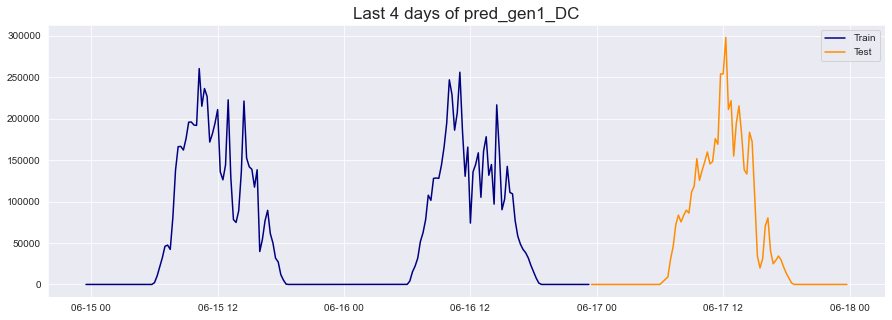

In [202]:

dataframe = pred_gen1_DC
dataframe_labels = "pred_gen1_DC"

train=dataframe[:192]
test=dataframe[-96:]


plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of ' + dataframe_labels,fontsize=17)
plt.legend()
plt.show()




Training and Forecasting

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=2279.039, Time=1.23 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=inf, Time=10.79 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=inf, Time=9.12 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=inf, Time=9.67 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=inf, Time=6.99 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=2232.832, Time=17.60 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=2226.239, Time=20.08 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=inf, Time=9.76 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=2266.200, Time=0.68 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=2222.810, Time=24.06 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=inf, Time=11.26 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=inf, Time=13.79 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=2261.852, Time=0.76 sec
 ARIMA(3,1,0)(1,1,1)[96]             : AIC=2218.087, Time=25.81 sec
 ARIMA(3,1,0)(0,1,1)[96]             : AIC=inf,

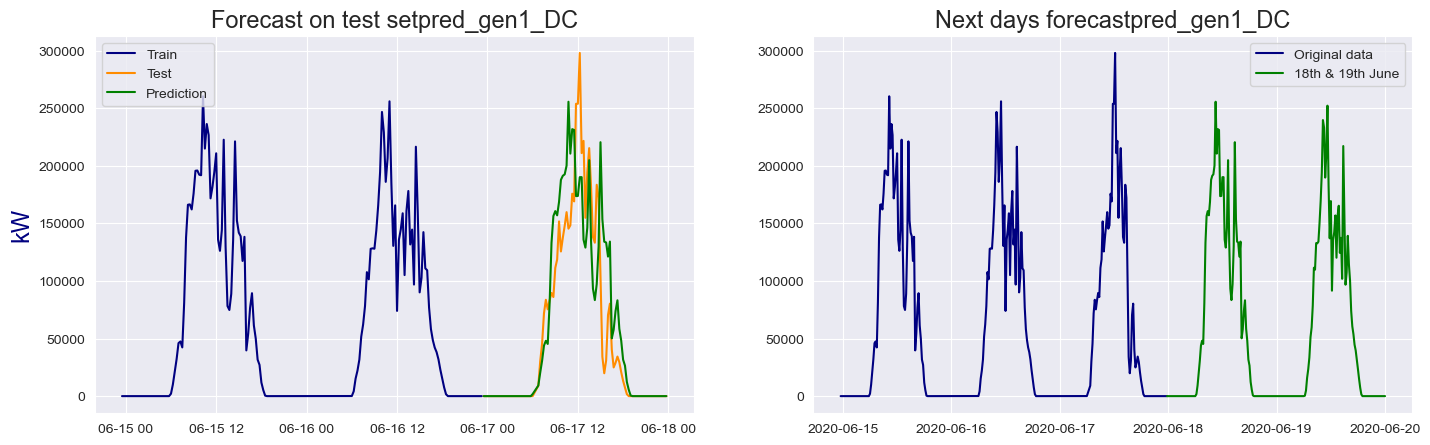

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(4, 1, 0)x(1, 1, [1], 96)   Log Likelihood               -1101.910
Date:                              Sun, 28 Nov 2021   AIC                           2217.821
Time:                                      20:29:46   BIC                           2235.698
Sample:                                           0   HQIC                          2225.044
                                              - 192                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4067      0.134     -3.045      0.002      -0.668      -0.145
ar.L2         -0.2460      0.125     -1.960      0.050      -0.492   -4.58e-05
ar.L3         -0.0547      0.113     -0.483      0.629      -0.277       0.167
ar.L4          0.1256      0.129      0.973      0.330      -0.127       0.378
ar.S.L96      -0.8488    973.119     -0.001      0.999   -1908.127    1906.429
ma.S.L96   -2.864e-05   3481.955  -8.22e-09      1.000   -6824.507    6824.507
sigma2      1.025e+09      0.089   1.15e+10      0.000    1.02e+09    1.02e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                80.07
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+25. Standard errors may be unstable.
"""

In [203]:
arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=12,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set' + dataframe_labels,size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(dataframe,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast' + dataframe_labels,size=17)
plt.show()

arima_model.summary()


## Prediction vs Baeline metrics pred_gen1_DC

Setting up common-sense baseline for DC_POWER

<AxesSubplot:xlabel='DATE_TIME,DATE_TIME'>

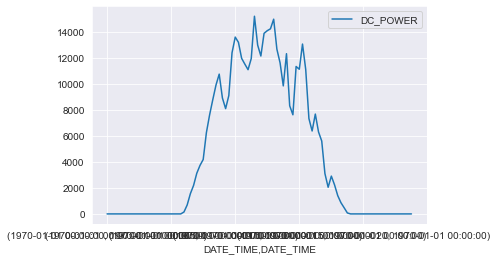

In [220]:
baseline = dataframe.groupby([pd.to_datetime(dataframe.index.hour), pd.to_datetime(dataframe.index.minute)])["DC_POWER"].mean()
baseline_df_DC = pd.DataFrame(baseline)
baseline_df_DC.plot()

In [207]:
print('Baseline R2 Score: %f' % (r2_score(baseline_df_DC['DC_POWER'], test['DC_POWER'])))
print('SARIMAX R2 Score: %f' % (r2_score(prediction['predicted_yield'],test['DC_POWER'])))
print('-'*15)
print('SARIMAX MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test['DC_POWER'])))
print('Baseline MAE Score: %f' % (mean_absolute_error(baseline_df_DC['DC_POWER'], test['DC_POWER'])))
print('-'*15)
print('SARIMAX RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test['DC_POWER'],squared=False)))
print('Baseline RMSE Score: %f' % (mean_squared_error(baseline_df_DC['DC_POWER'], test['DC_POWER'],squared=False)))

Baseline R2 Score: 0.861489
SARIMAX R2 Score: 0.720459
---------------
SARIMAX MAE Score: 24644.005186
Baseline MAE Score: 14857.847333
---------------
SARIMAX RMSE Score: 41293.996795
Baseline RMSE Score: 27268.823157


# pred_gen2_DC Forecasts
Setting up dataframe

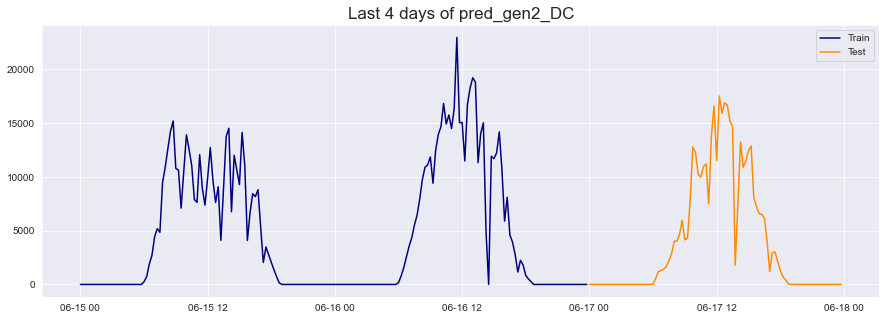

In [208]:

dataframe = pred_gen2_DC
dataframe_labels = "pred_gen2_DC"


train=dataframe[:192]
test=dataframe[-96:]

plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of ' + dataframe_labels,fontsize=17)
plt.legend()
plt.show()




Training and Forecasting

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1807.650, Time=1.25 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=inf, Time=23.46 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=inf, Time=39.07 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=inf, Time=13.83 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=inf, Time=23.05 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=inf, Time=37.37 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1800.399, Time=0.99 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=inf, Time=35.82 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=67.25 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=1796.742, Time=1.33 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=inf, Time=32.08 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=inf, Time=56.21 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=inf, Time=68.49 sec
 ARIMA(3,1,0)(0,1,0)[96]             : AIC=1798.758, Time=1.57 sec
 ARIMA(2,1,1)(0,1,0)[96]             : AIC=1798.787, Time=2

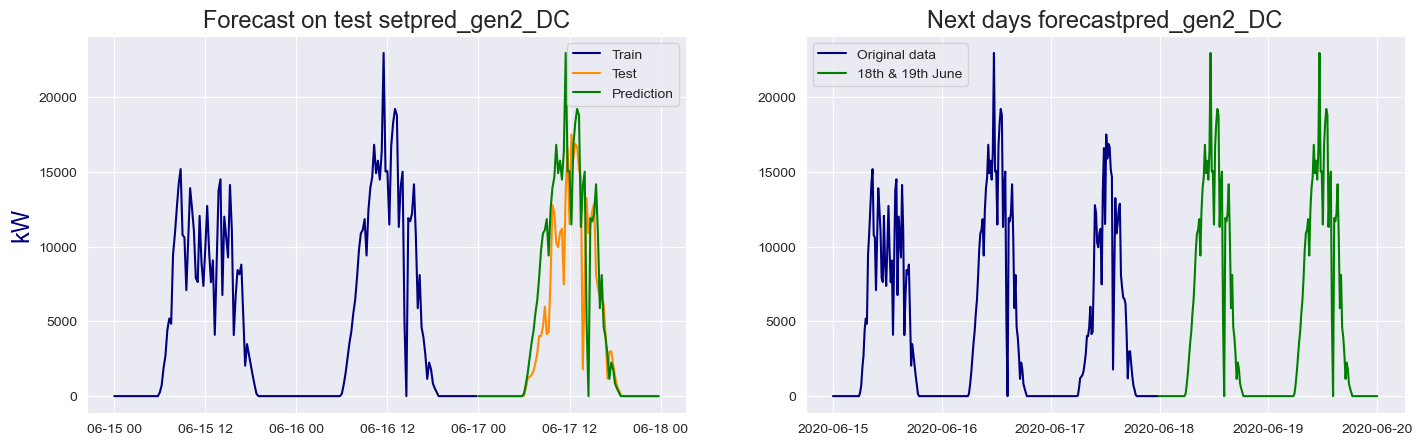

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 96)   Log Likelihood                -895.371
Date:                            Sun, 28 Nov 2021   AIC                           1796.742
Time:                                    20:42:46   BIC                           1804.404
Sample:                                         0   HQIC                          1799.838
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3758      0.059     -6.330      0.000      -0.492      -0.259
ar.L2         -0.2405      0.077     -3.137      0.002      -0.391      -0.090
sigma2      9.183e+06   8.02e+05     11.443      0.000    7.61e+06    1.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                70.28
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:
arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=12,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set' + dataframe_labels,size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(dataframe,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast' + dataframe_labels,size=17)
plt.show()

arima_model.summary()


## Prediction vs Baeline metrics pred_gen2_DC

### Baseline


Setting up common-sense baseline for DC_POWER

<AxesSubplot:xlabel='DATE_TIME,DATE_TIME'>

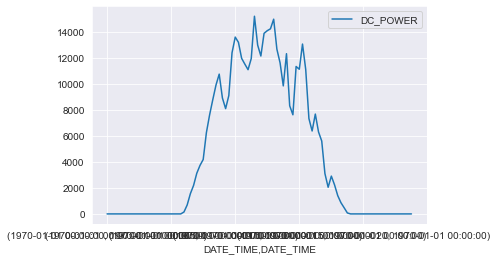

In [217]:
baseline = dataframe.groupby([pd.to_datetime(dataframe.index.hour), pd.to_datetime(dataframe.index.minute)])["DC_POWER"].mean()
baseline_df_DC = pd.DataFrame(baseline)
baseline_df_DC.plot()

In [218]:
print('Baseline R2 Score: %f' % (r2_score(baseline_df_DC['DC_POWER'], test['DC_POWER'])))
print('SARIMAX R2 Score: %f' % (r2_score(prediction['predicted_yield'],test['DC_POWER'])))
print('-'*15)
print('SARIMAX MAE Score: %f' % (mean_absolute_error(prediction['predicted_yield'],test['DC_POWER'])))
print('Baseline MAE Score: %f' % (mean_absolute_error(baseline_df_DC['DC_POWER'], test['DC_POWER'])))
print('-'*15)
print('SARIMAX RMSE Score: %f' % (mean_squared_error(prediction['predicted_yield'],test['DC_POWER'],squared=False)))
print('Baseline RMSE Score: %f' % (mean_squared_error(baseline_df_DC['DC_POWER'], test['DC_POWER'],squared=False)))

Baseline R2 Score: 0.857306
SARIMAX R2 Score: 0.735312
---------------
SARIMAX MAE Score: 1834.599707
Baseline MAE Score: 1083.064739
---------------
SARIMAX RMSE Score: 3339.870104
Baseline RMSE Score: 1999.946199


 # Conclusions
 
ARIMAX outperforms common-sense-baseline for DAILY_YIELD (displayed top left) but not DC_POWER (top right).

Our chosen common-sense-baseline is an aggregation of all values for that time-step (15 min), which would produce the most expectant value within 80% accuracy. Pictured at top.

To properly tune ARIMA in-depth knowledge of the model and data is required. We suggest further research can be done to understand this discrepancy in performance among different data types when similar performance is to be expected. 

The much greater degree of variance is one suspected culprit in DC_POWER.